In [5]:
%pylab inline
import numpy as np
import pandas as pd
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ndim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [6]:
import sys
sys.path.append("../errortools/")
import errortools

# Fitting and predicting

In [7]:
ndim = 3
fit_intercept = True
ndata = 100

p_true = [2, 0, -2, 0]

In [8]:
np.random.seed(42)
X = np.random.uniform(low=-1, high=1, size=ndim*ndata).reshape(ndata, ndim)
p = scipy.stats.logistic.cdf(np.dot(np.concatenate((X, np.ones((X.shape[0],1), dtype=float)), axis=1), p_true))
y = (p > np.random.uniform(size=ndata)).astype(int)

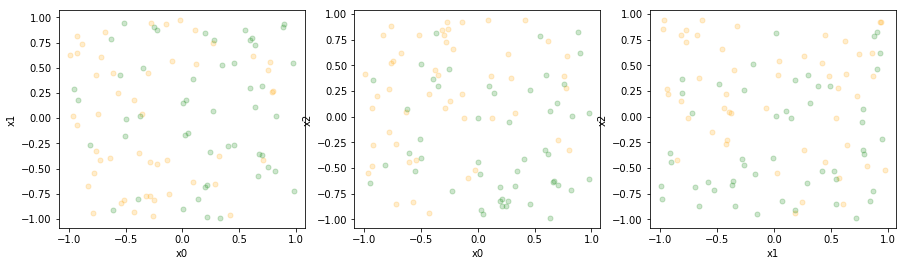

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))

ax[0].plot(X[y==0,0], X[y==0,1], 'o', color='orange', alpha=0.2, markersize=5)
ax[0].plot(X[y==1,0], X[y==1,1], 'o', color='green',  alpha=0.2, markersize=5)
ax[0].set_xlabel("x0")
ax[0].set_ylabel("x1")

ax[1].plot(X[y==0,0], X[y==0,2], 'o', color='orange', alpha=0.2, markersize=5)
ax[1].plot(X[y==1,0], X[y==1,2], 'o', color='green',  alpha=0.2, markersize=5)
ax[1].set_xlabel("x0")
ax[1].set_ylabel("x2")

ax[2].plot(X[y==0,1], X[y==0,2], 'o', color='orange', alpha=0.2, markersize=5)
ax[2].plot(X[y==1,1], X[y==1,2], 'o', color='green',  alpha=0.2, markersize=5)
ax[2].set_xlabel("x1")
ax[2].set_ylabel("x2");

In [10]:
model = errortools.LogisticRegression(fit_intercept=True)
model.fit(X,y)

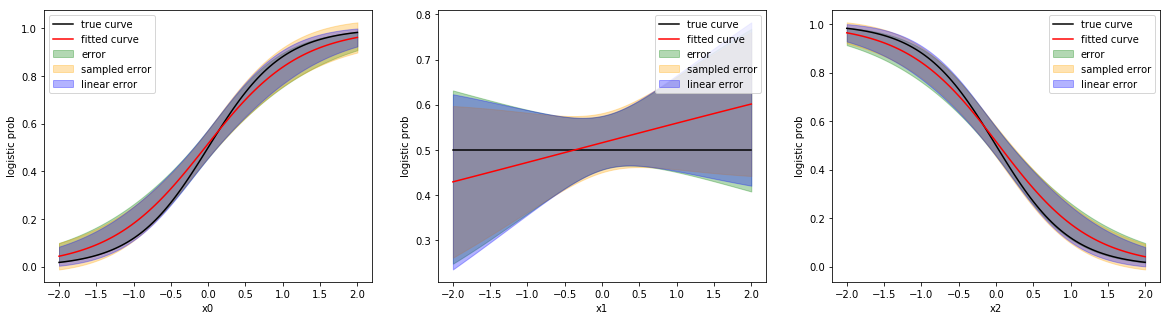

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))

nstddvs = 1

p = model.parameters
cvr_mtx = model.cvr_mtx
prc_mtx = np.linalg.inv(cvr_mtx)

u = np.linspace(-2, 2, 100).reshape(-1,1)
a = np.zeros((100,1), dtype=float)

x = np.concatenate((u, a, a), axis=1)
f = model.predict(x)
el1, eu1 = model.estimate_errors(x, nstddvs)
els, eus = model.estimate_errors_sampling(x, 100)
ell, eul = model.estimate_errors_linear(x, 1)
g = scipy.stats.logistic.cdf(np.dot(np.concatenate((x,np.ones((x.shape[0],1))),axis=1), p_true))
ax[0].plot(u, g, '-', color='black', alpha=1, label="true curve")
ax[0].plot(u, f, '-', color='red', label="fitted curve")
ax[0].fill_between(x=u.ravel(), y1=f-el1, y2=f+eu1, alpha=0.3, color='green', label="error")
ax[0].fill_between(x=u.ravel(), y1=f-nstddvs*els, y2=f+nstddvs*eus, alpha=0.3, color='orange', label="sampled error")
ax[0].fill_between(x=u.ravel(), y1=f-nstddvs*ell, y2=f+nstddvs*eul, alpha=0.3, color='blue', label="linear error")
ax[0].set_xlabel("x0")
ax[0].set_ylabel("logistic prob")
ax[0].legend()

x = np.concatenate((a, u, a), axis=1)
f = model.predict(x)
el1, eu1 = model.estimate_errors(x, nstddvs)
els, eus = model.estimate_errors_sampling(x, 100)
ell, eul = model.estimate_errors_linear(x, 1)
g = scipy.stats.logistic.cdf(np.dot(np.concatenate((x,np.ones((x.shape[0],1))),axis=1), p_true))
ax[1].plot(u, g, '-', color='black', alpha=1, label="true curve")
ax[1].plot(u, f, '-', color='red', label="fitted curve")
ax[1].fill_between(x=u.ravel(), y1=f-el1, y2=f+eu1, alpha=0.3, color='green', label="error")
ax[1].fill_between(x=u.ravel(), y1=f-nstddvs*els, y2=f+nstddvs*eus, alpha=0.3, color='orange', label="sampled error")
ax[1].fill_between(x=u.ravel(), y1=f-nstddvs*ell, y2=f+nstddvs*eul, alpha=0.3, color='blue', label="linear error")
ax[1].set_xlabel("x1")
ax[1].set_ylabel("logistic prob")
ax[1].legend()

x = np.concatenate((a, a, u), axis=1)
f = model.predict(x)
el1, eu1 = model.estimate_errors(x, nstddvs)
els, eus = model.estimate_errors_sampling(x, 100)
ell, eul = model.estimate_errors_linear(x, 1)
g = scipy.stats.logistic.cdf(np.dot(np.concatenate((x,np.ones((x.shape[0],1))),axis=1), p_true))
ax[2].plot(u, g, '-', color='black', alpha=1, label="true curve")
ax[2].plot(u, f, '-', color='red', label="fitted curve")
ax[2].fill_between(x=u.ravel(), y1=f-el1, y2=f+eu1, alpha=0.3, color='green', label="error")
ax[2].fill_between(x=u.ravel(), y1=f-nstddvs*els, y2=f+nstddvs*eus, alpha=0.3, color='orange', label="sampled error")
ax[2].fill_between(x=u.ravel(), y1=f-nstddvs*ell, y2=f+nstddvs*eul, alpha=0.3, color='blue', label="linear error")
ax[2].set_xlabel("x2")
ax[2].set_ylabel("logistic prob")
ax[2].legend();